In [15]:
from megane2.predictor import Predictor
from megane import config
from PIL import Image
import torch
from torchvision.transforms import functional as TF
from megane2 import visualize

In [2]:
cfg = config.read_yaml("./configs2/db_mobilenet_v3_large.yml")
cfg['weights'] = './storage/weights/db_mobilenet_v3_large.pt'

In [5]:
predictor = Predictor(cfg)

In [9]:
image = Image.open("toybox/word-level-megane/dense-01.png").convert("RGB")
# image = Image.open("/tmp/test.png").convert("RGB")

In [10]:
with torch.no_grad():
    polygons, labels, scores, proba_maps = predictor.predict(image)

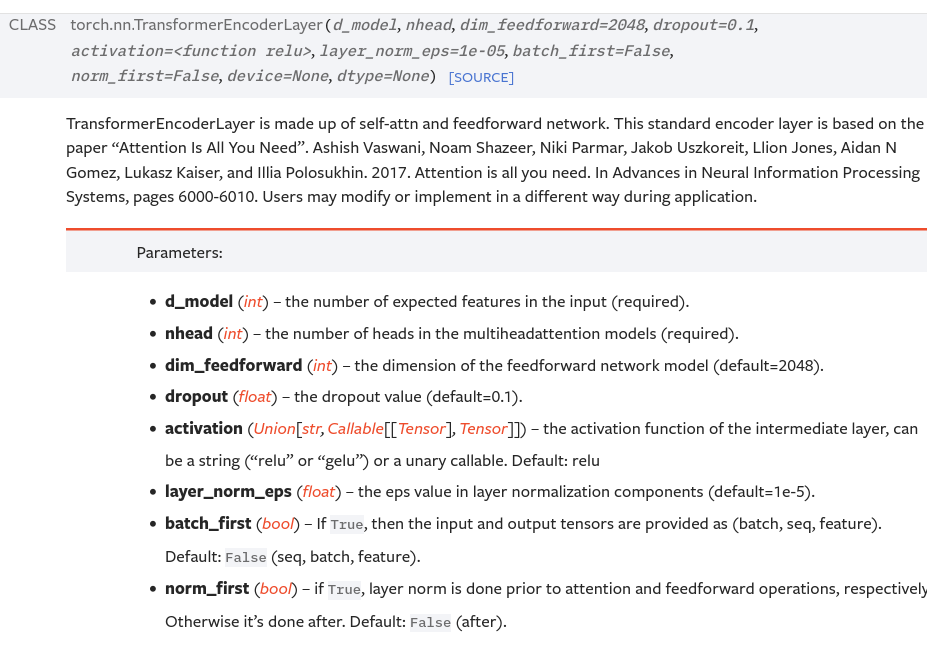

In [11]:
visualize.draw_polygons(image, polygons, outline=(255, 0, 0))

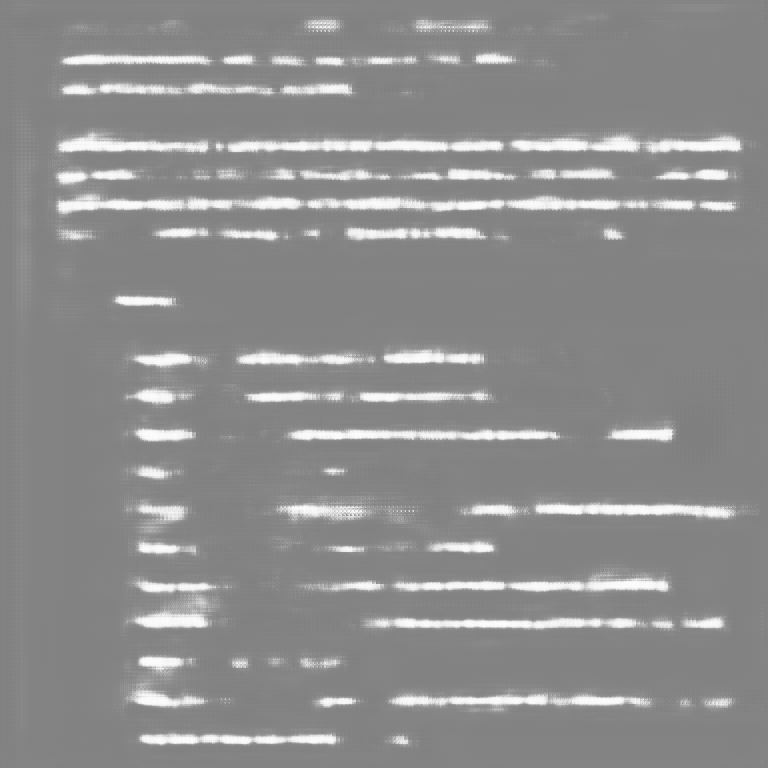

In [14]:
TF.to_pil_image(torch.sigmoid(torch.tensor(5 * proba_maps)))